In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install numpy opencv-python pillow tensorflow keras imutils scikit-learn matplotlib

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns

In [ ]:
SIZE = 128 #img size

# **Gaussian**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/gaussian_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
folders = ['startpage',
'winwebsec',
'zbot',
'obfuscator',
'vobfus',
'onlinegames',
'rbot',
'zeroaccess',
'renos',
'vundo',
'cycbot',
'hotbar',
'agent',
'fakerean',
'delfinject',
'bho',
'ceeinject',
'alureon',
'adload',
'lolyda']

In [ ]:
print(len(test_images))
print(len(test_labels))

5292
5292


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = load_model('/content/drive/MyDrive/Malware/Merged_model_128x128_Malhub.h5')

In [ ]:
y_pred = model.predict(x_test)


166/166 [==============================] - 16s 41ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.9928193499622071
Macro-Averaged F1 Score: 0.9923987415071736
Accuracy: 0.9928193499622071
Micro-Averaged Precision: 0.9928193499622071
Macro-Averaged Precision: 0.9935177814967308
Micro-Averaged Recall: 0.9928193499622071
Macro-Averaged Recall: 0.9915096743144968


In [ ]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

166/166 [==============================] - 6s 38ms/step


[[199   0   0   0   0   0   0   0   0   0   0  11   0   0   0   0   0   0
    0   0]
 [  0 163   0   0   0   6   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 266   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 236   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 179   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 206   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 223   0   7   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 213   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 299   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 183   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 289   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 259   0   0   0   0

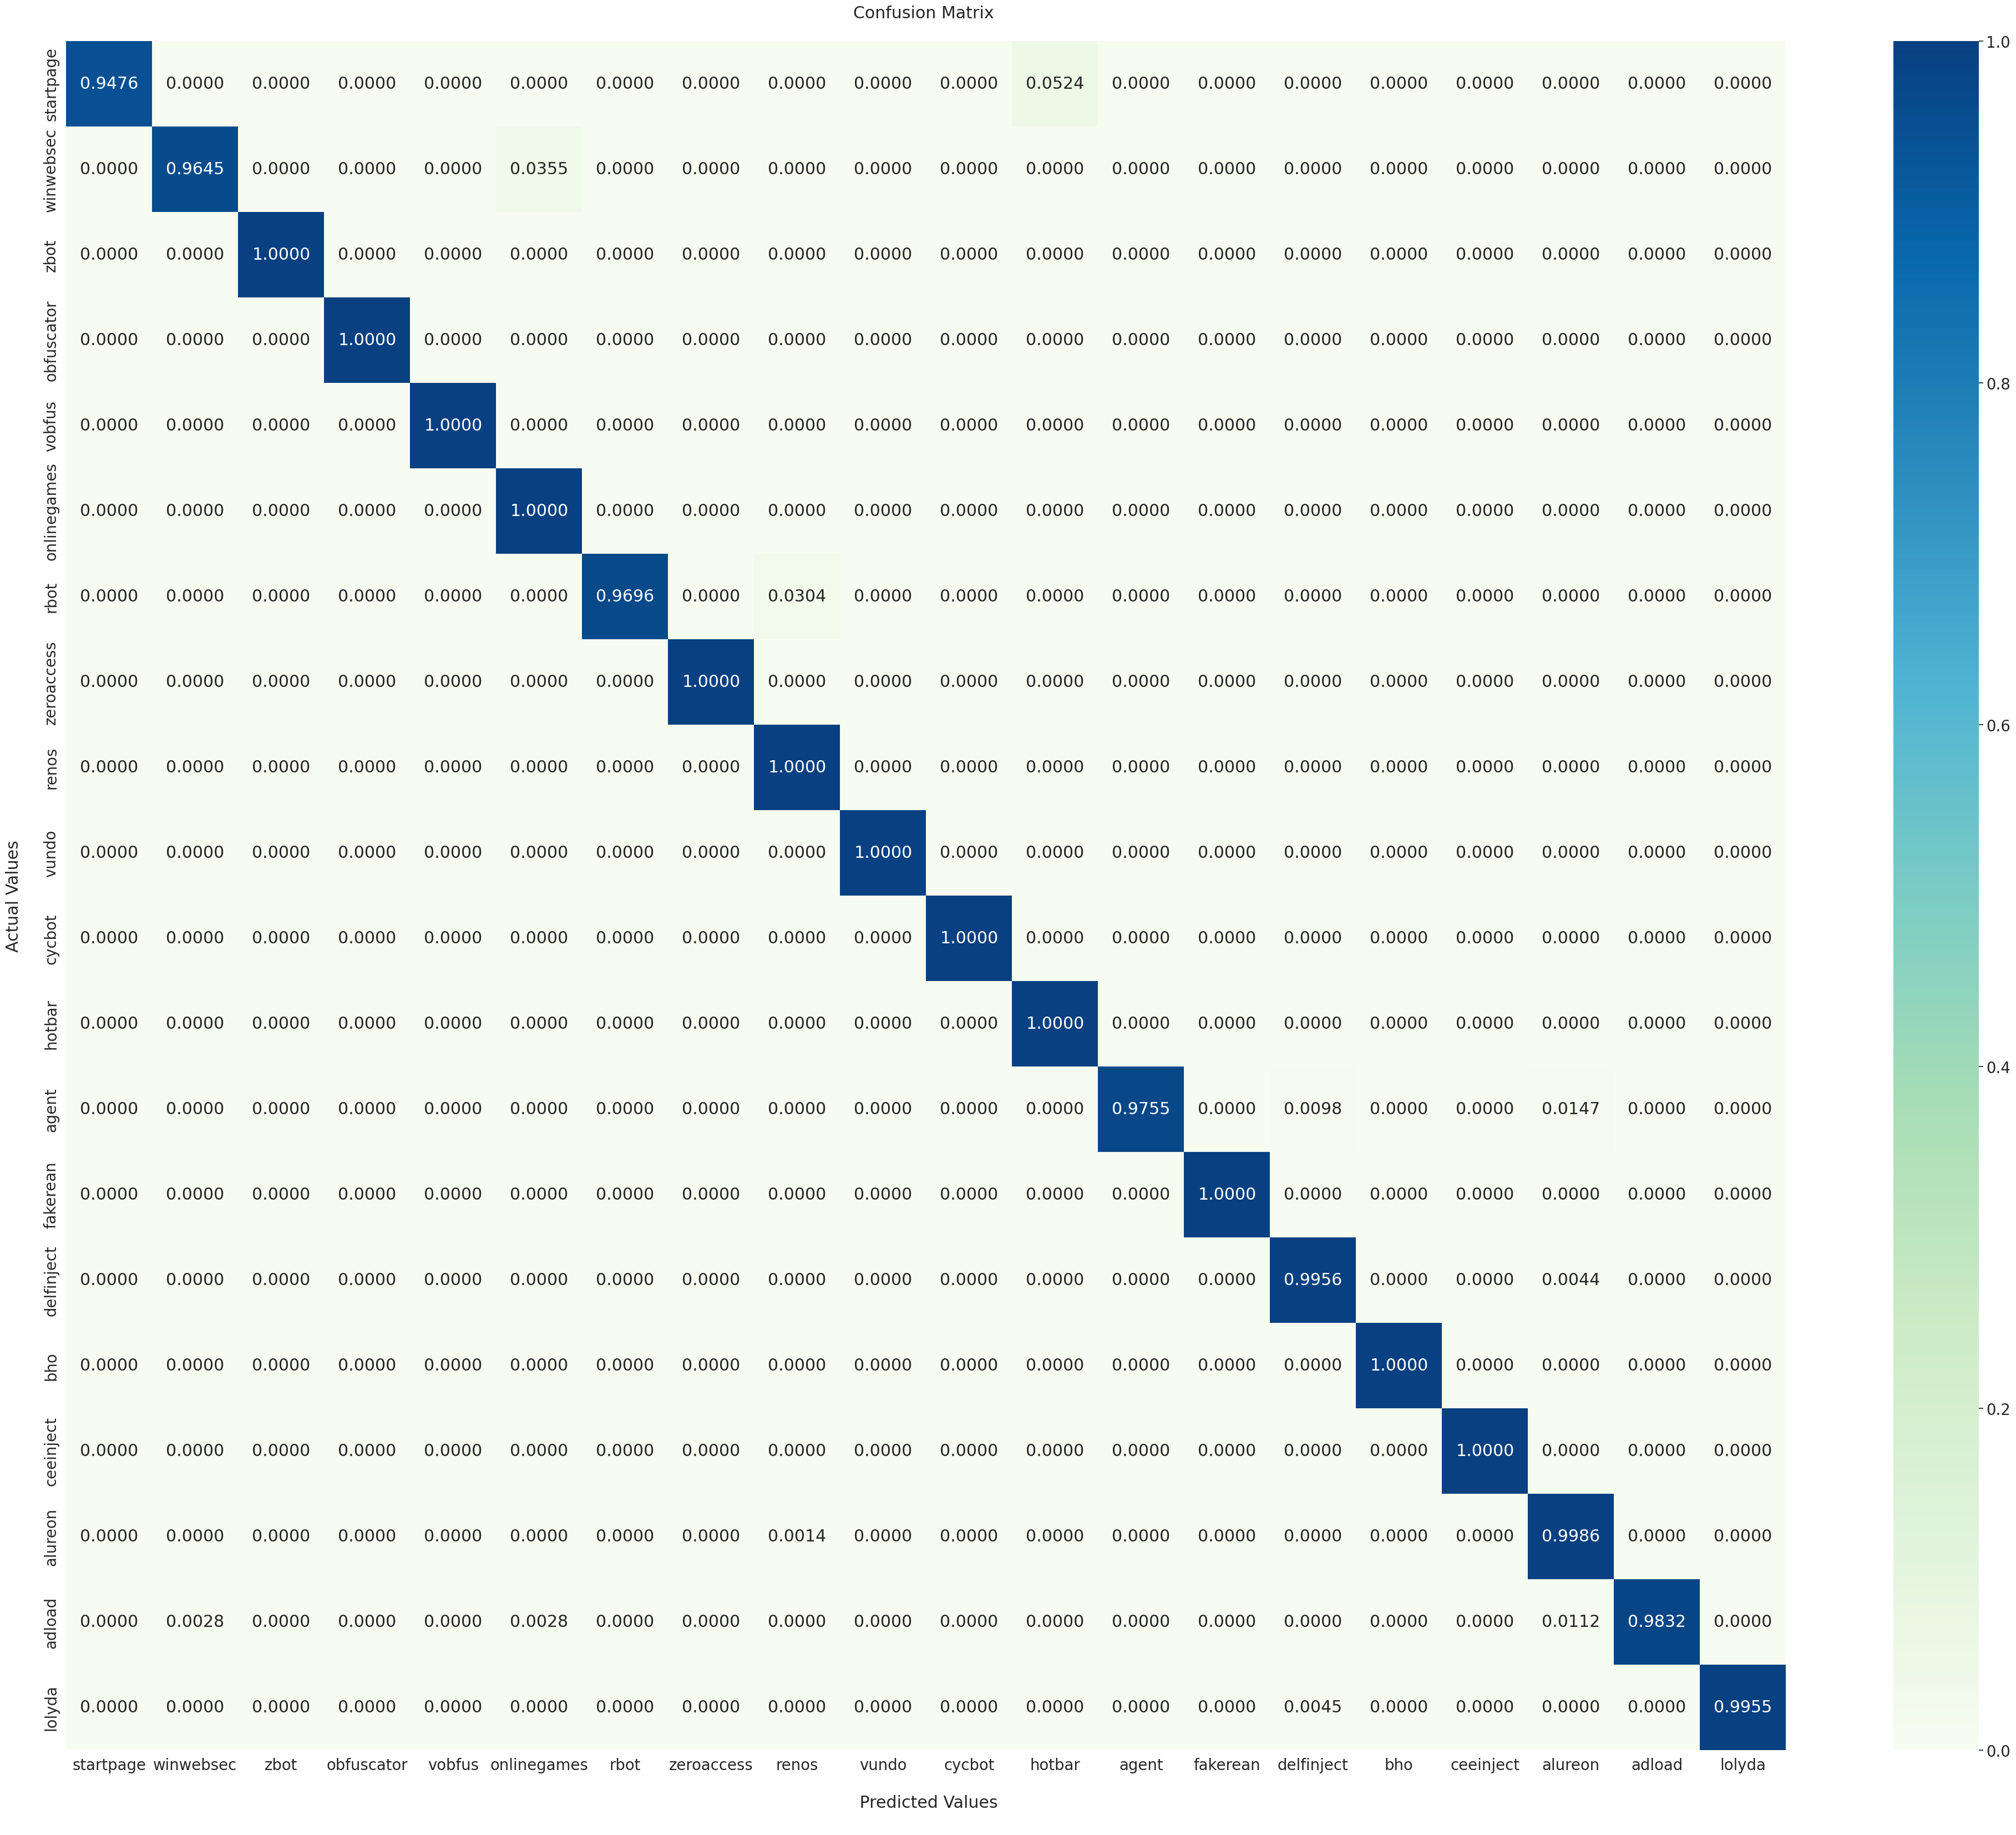

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN ,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

# **Local** **Variable**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/localvar_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
y_pred = model.predict(x_test)


331/331 [==============================] - 13s 38ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.5562169312169312
Macro-Averaged F1 Score: 0.6249672380565295
Accuracy: 0.5562169312169312
Micro-Averaged Precision: 0.5562169312169312
Macro-Averaged Precision: 0.8922301362514293
Micro-Averaged Recall: 0.5562169312169312
Macro-Averaged Recall: 0.5358188388685716


In [ ]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

331/331 [==============================] - 13s 39ms/step


[[ 199    0    0    0    0    0    0   70   95    0    3   11    0    0
     0    0    0   42    0    0]
 [   0  164    0    0    0    5    0  164    0    0    1    0    0    0
     0    0    0    4    0    0]
 [   0    0  266    0    0    0    0  155  109    0    2    0    0    0
     0    0    0    0    0    0]
 [   0    0    0  236    0    0    0    7  221    0    0    0    0    0
     0    0    0    8    0    0]
 [   0    0    0    0  179    0    0    0  173    0    0    0    0    0
     0    0    0    6    0    0]
 [   0    0    0    0    0  206    0  137    0    0   20    0    0    0
     0    0    0   49    0    0]
 [   0    0    0    0    0    0  221    9  224    0    0    0    0    0
     0    0    0    6    0    0]
 [   0    0    0    0    0    0    0  426    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  299  299    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  107    0  183   7

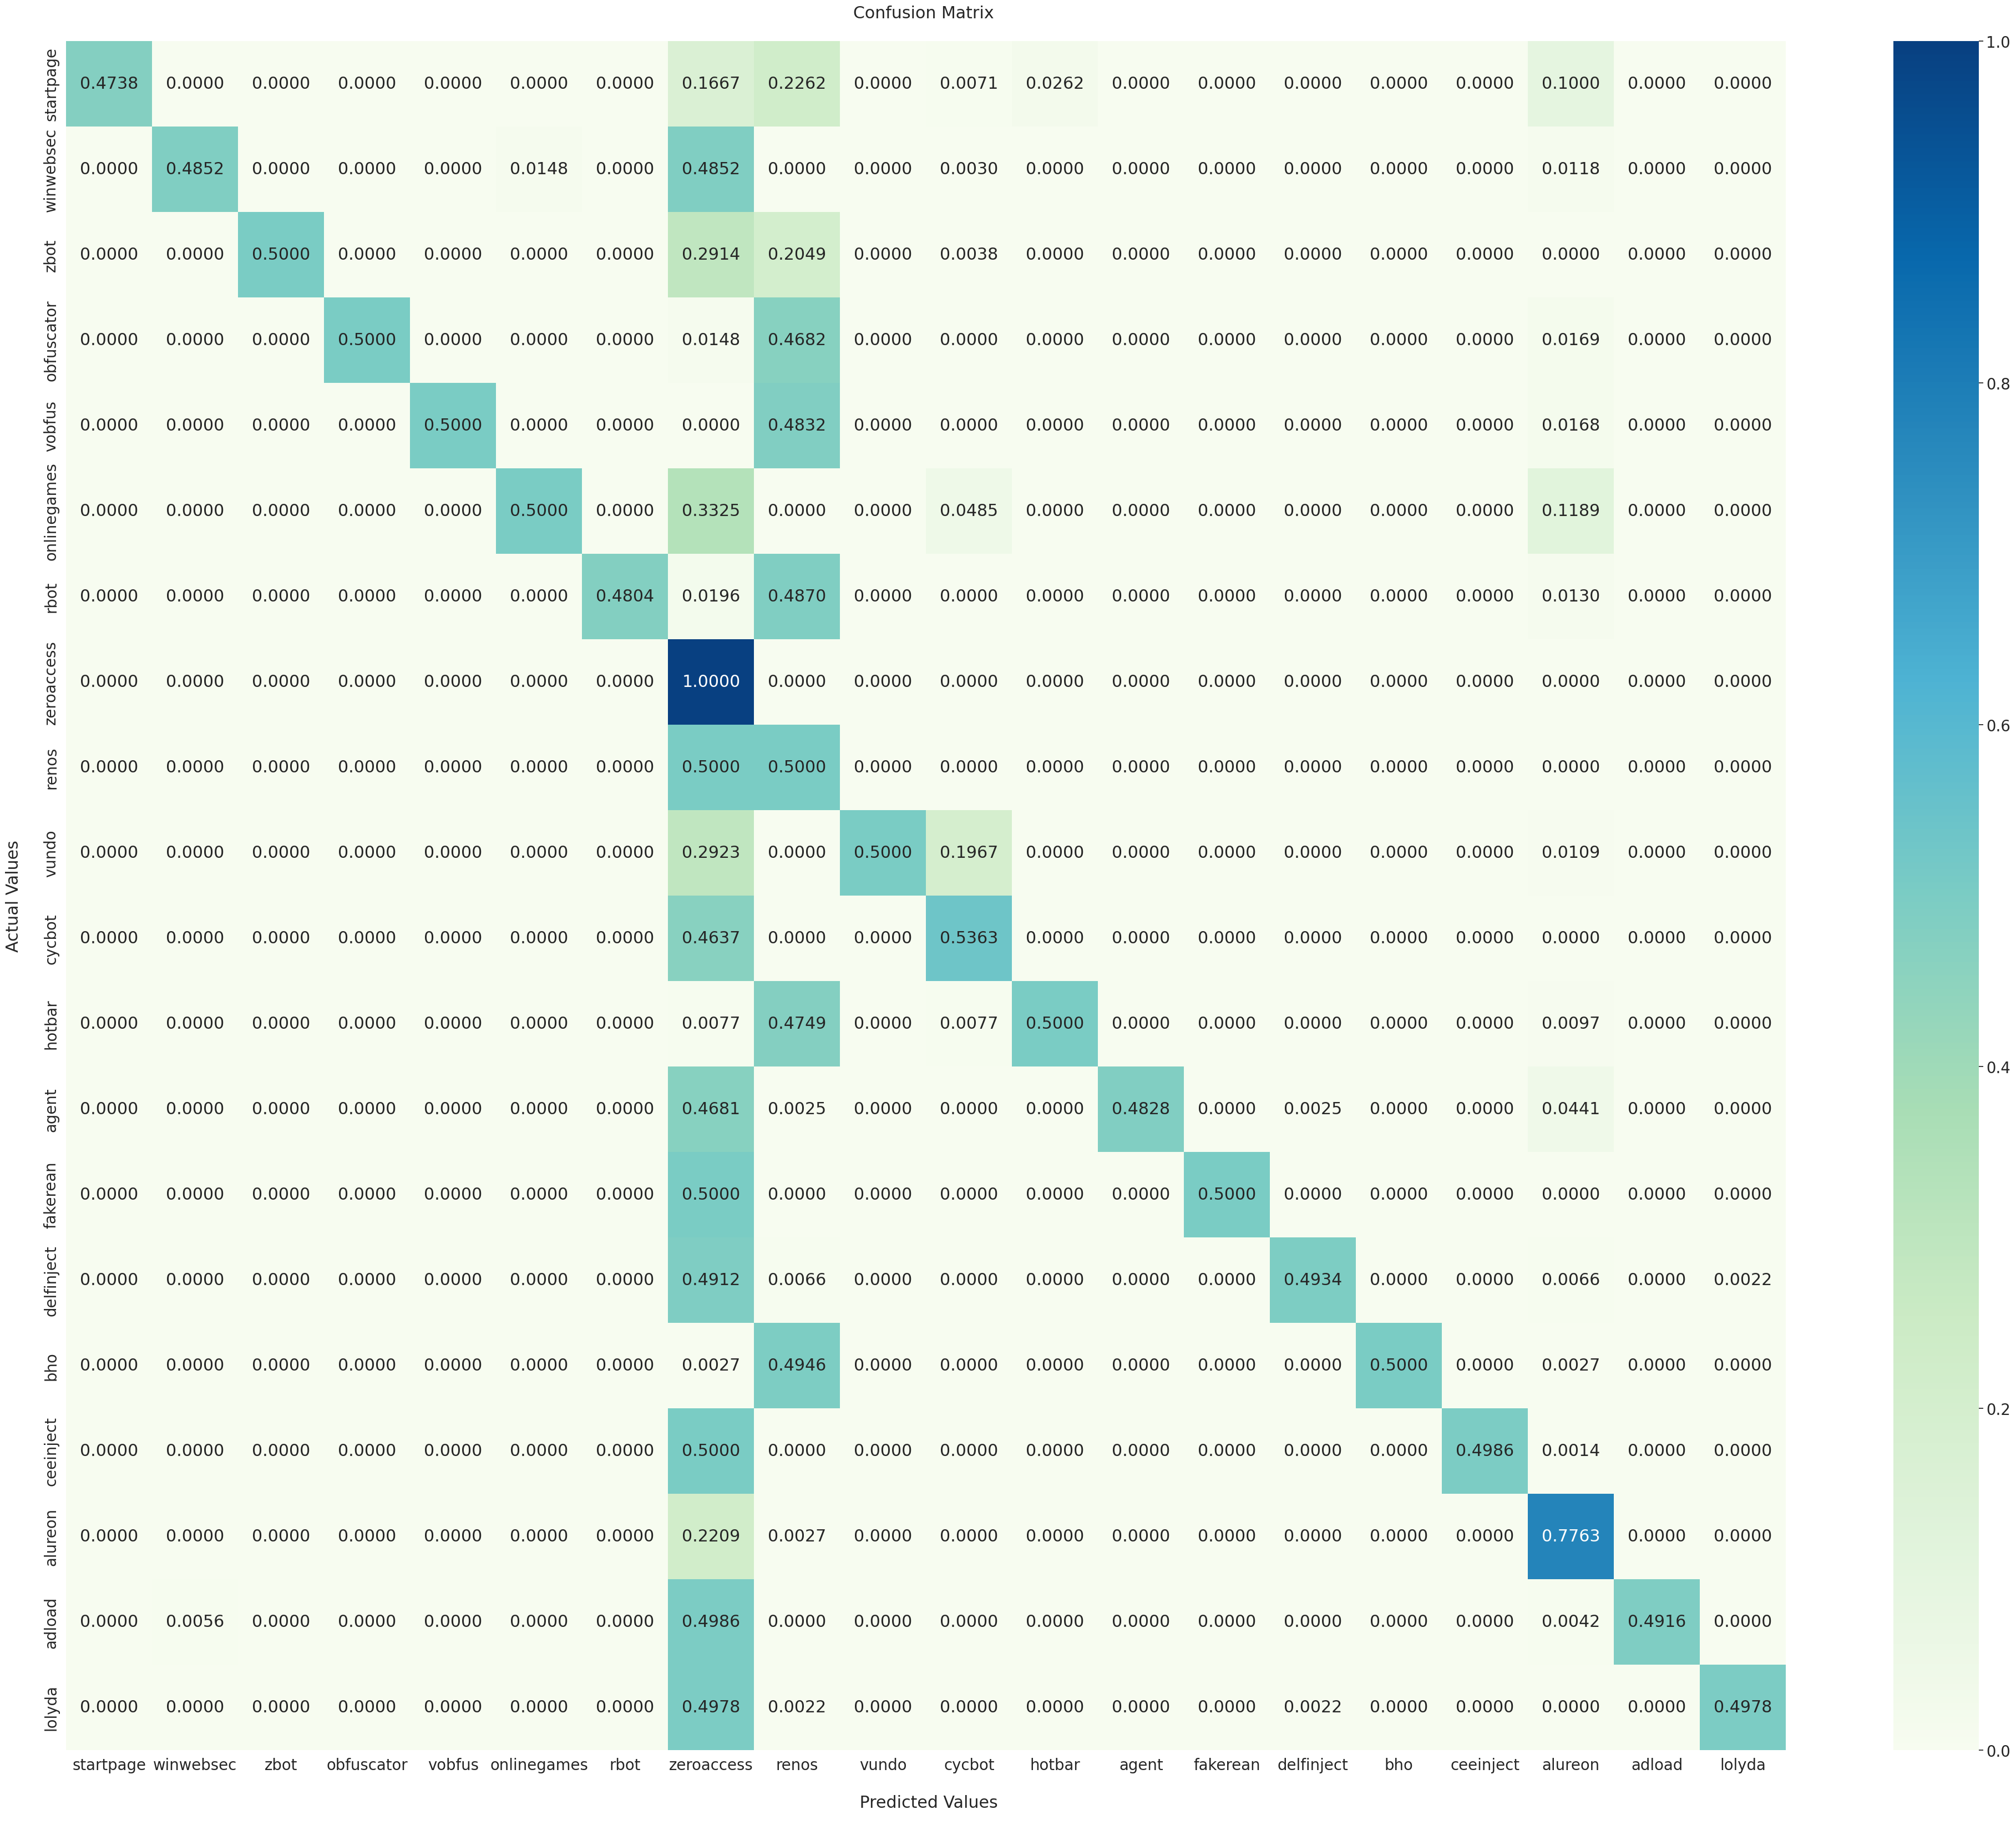

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN ,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

# **Poisson**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/poisson_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

8409
8409


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = load_model('/content/drive/MyDrive/Malware/Merged_model_128x128_Malhub.h5')

In [ ]:
y_pred = model.predict(x_test)


263/263 [==============================] - 12s 40ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.5562169312169312
Macro-Averaged F1 Score: 0.6249672380565295
Accuracy: 0.5562169312169312
Micro-Averaged Precision: 0.5562169312169312
Macro-Averaged Precision: 0.8922301362514293
Micro-Averaged Recall: 0.5562169312169312
Macro-Averaged Recall: 0.5358188388685716


In [ ]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

263/263 [==============================] - 10s 38ms/step


[[   0    0    0    0    0    0    0    0  187    0   23    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0   70    0    0    0    0   25    0    0    5
     0    0    0   69    0    0]
 [   0    0    0    0    0    0    0    0  266    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  236    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  179    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0  222    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  230    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0  213    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  298    0    0    0    0    0
     0    0    0    1    0    0]
 [   0    0    0    0    0   32    0    0    0    0  15

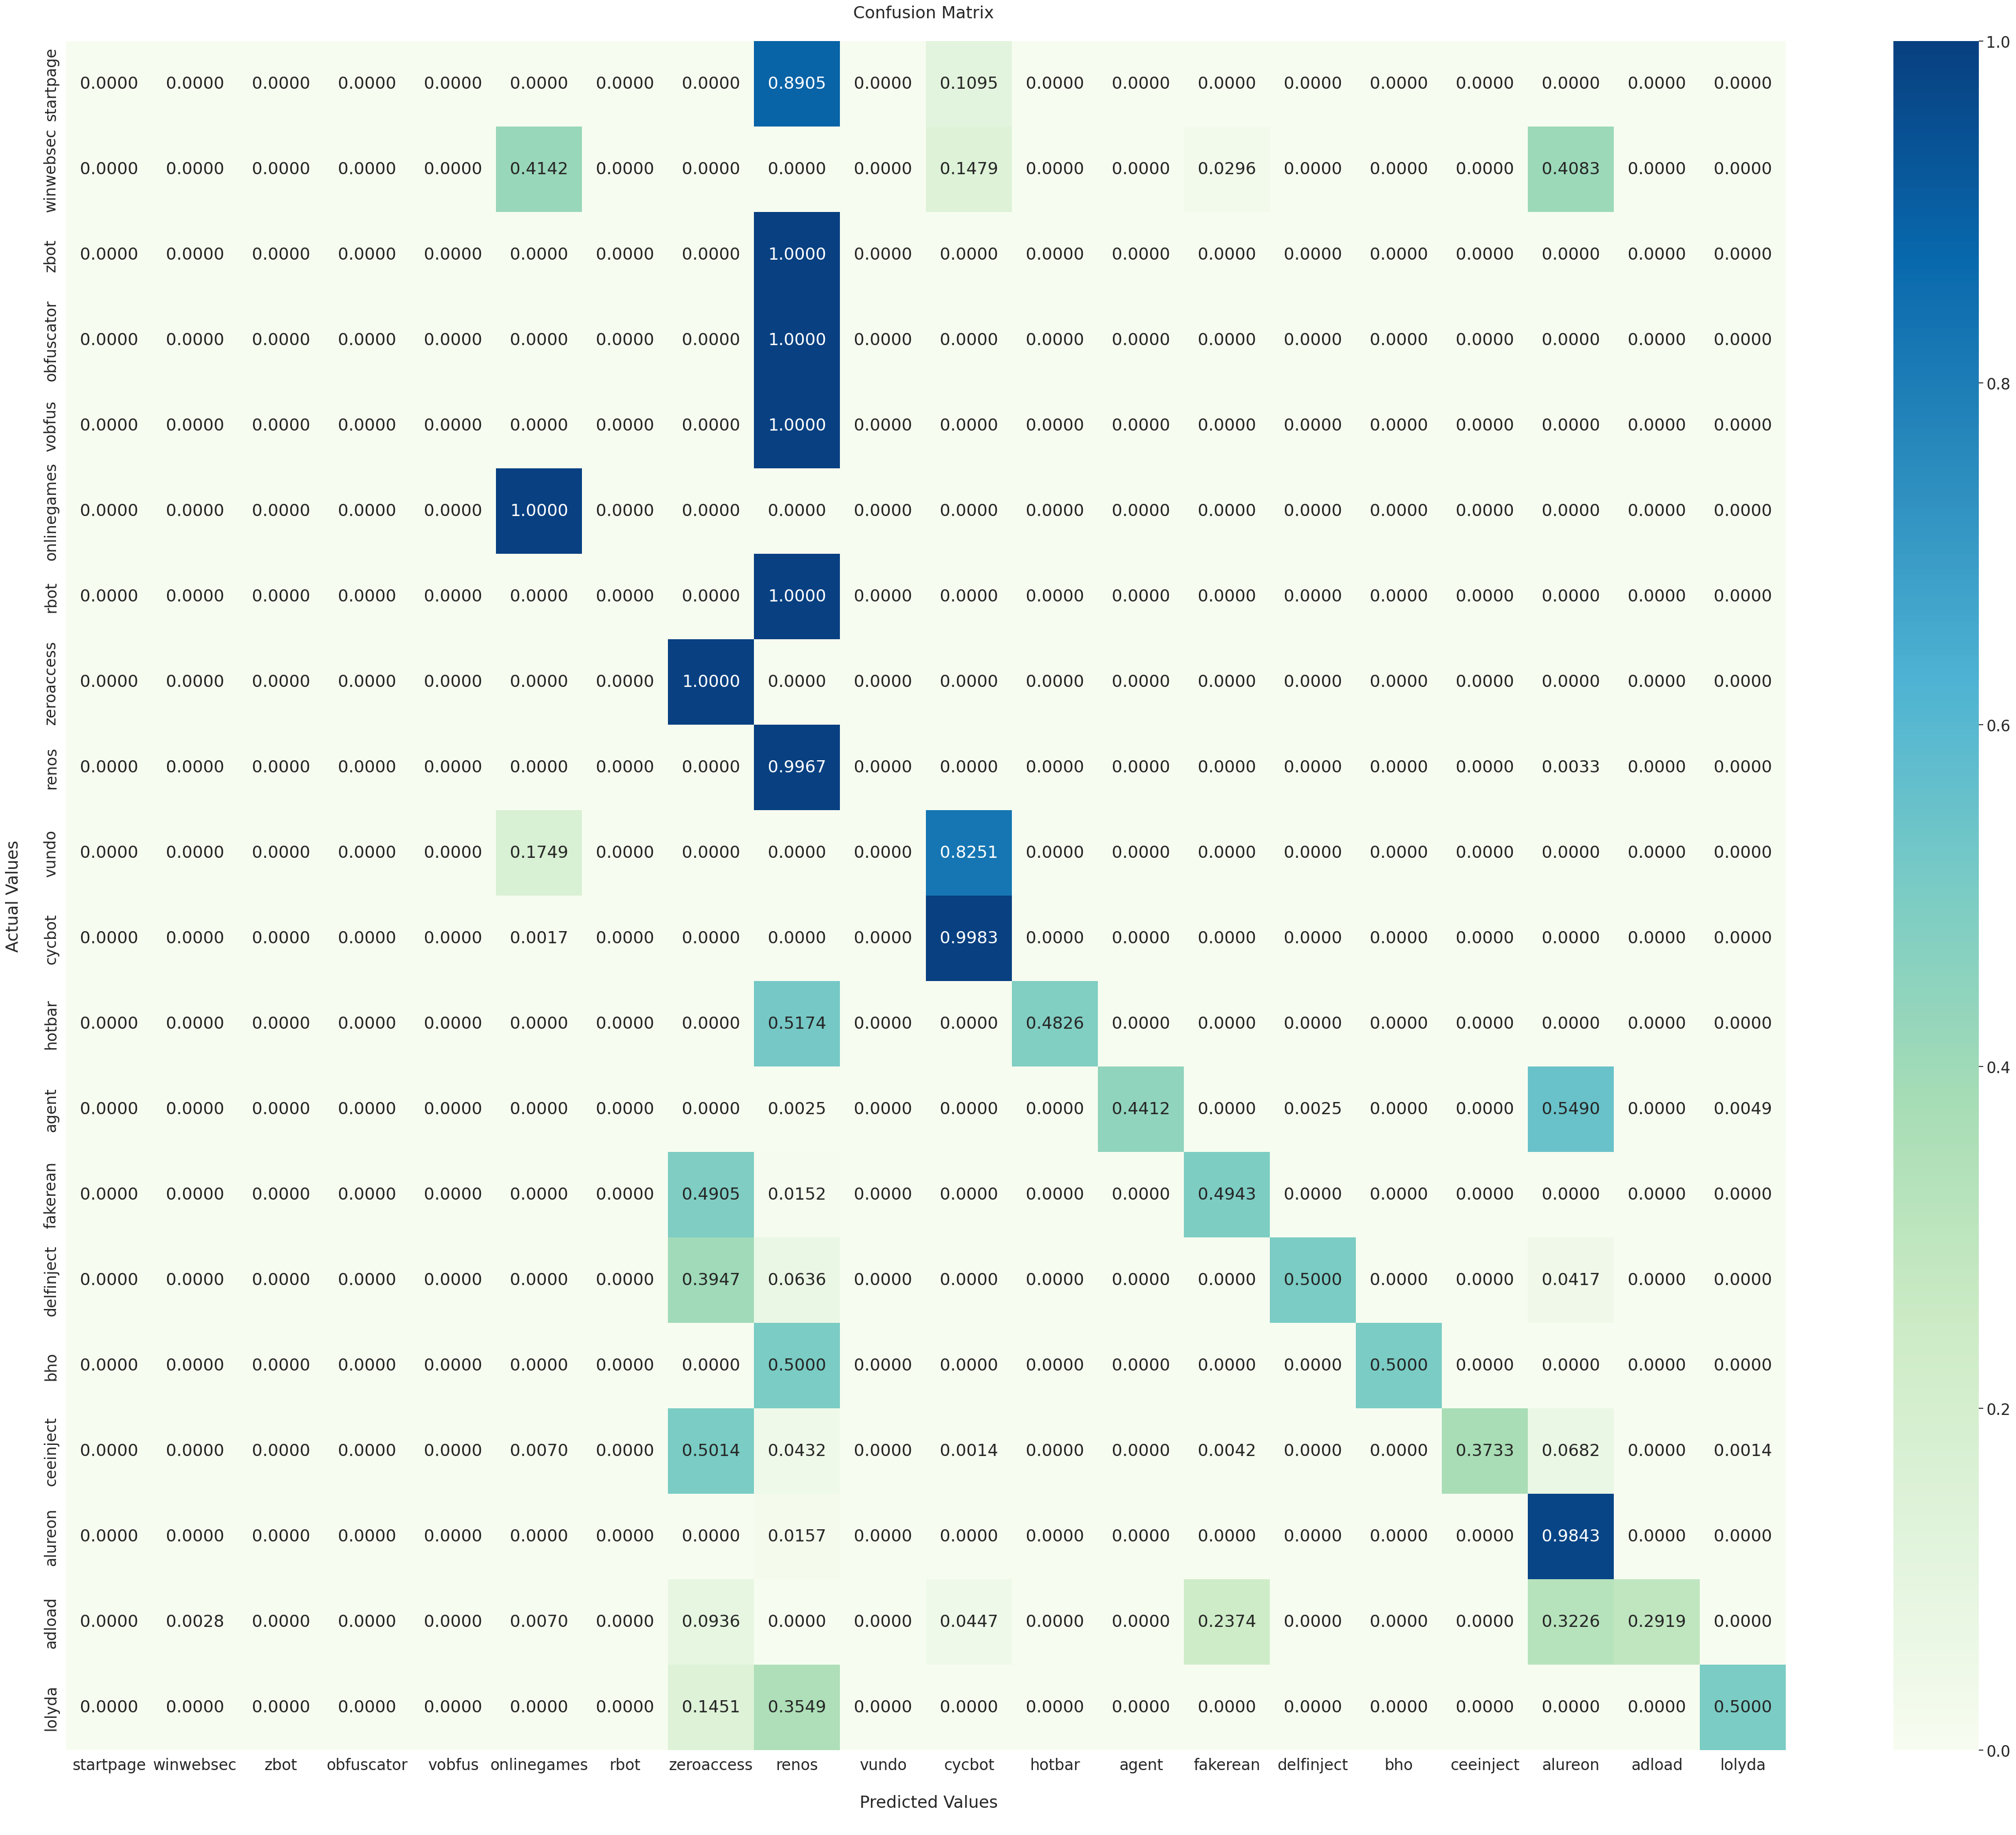

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN ,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

# **Salt**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/salt_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

5292
5292


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = load_model('/content/drive/MyDrive/Malware/Merged_model_128x128_Malhub.h5')

In [ ]:
y_pred = model.predict(x_test)


166/166 [==============================] - 7s 38ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.3238851095993953
Macro-Averaged F1 Score: 0.1421143146594522
Accuracy: 0.3238851095993953
Micro-Averaged Precision: 0.3238851095993953
Macro-Averaged Precision: 0.10937611207627762
Micro-Averaged Recall: 0.3238851095993953
Macro-Averaged Recall: 0.2469926950263912


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Pepper**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/pepper_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

5292
5292


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = load_model('/content/drive/MyDrive/Malware/Merged_model_128x128_Malhub.h5')

In [ ]:
y_pred = model.predict(x_test)


166/166 [==============================] - 7s 38ms/step


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.3238851095993953
Macro-Averaged F1 Score: 0.1421143146594522
Accuracy: 0.3238851095993953
Micro-Averaged Precision: 0.3238851095993953
Macro-Averaged Precision: 0.10937611207627762
Micro-Averaged Recall: 0.3238851095993953
Macro-Averaged Recall: 0.2469926950263912


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
prediction_NN = model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

166/166 [==============================] - 6s 38ms/step


[[  0   0   0   0   0   0   0   0 182   0  24   0   0   0   0   0   0   4
    0   0]
 [  0   0   0   0   0  54   0   1   0   0  30   0   0  12   0   0   0  72
    0   0]
 [  0   0   0   0   0   0   0   0 266   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 236   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 179   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 201   0   0   0   0   4   0   0   0   0   0   0   1
    0   0]
 [  0   0   0   0   0   0   0   0 230   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 213   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 294   0   0   0   0   0   0   0   0   5
    0   0]
 [  0   0   0   0   0  40   0   0   0   0 143   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 289   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 259   0   0   0   0   0   0   0

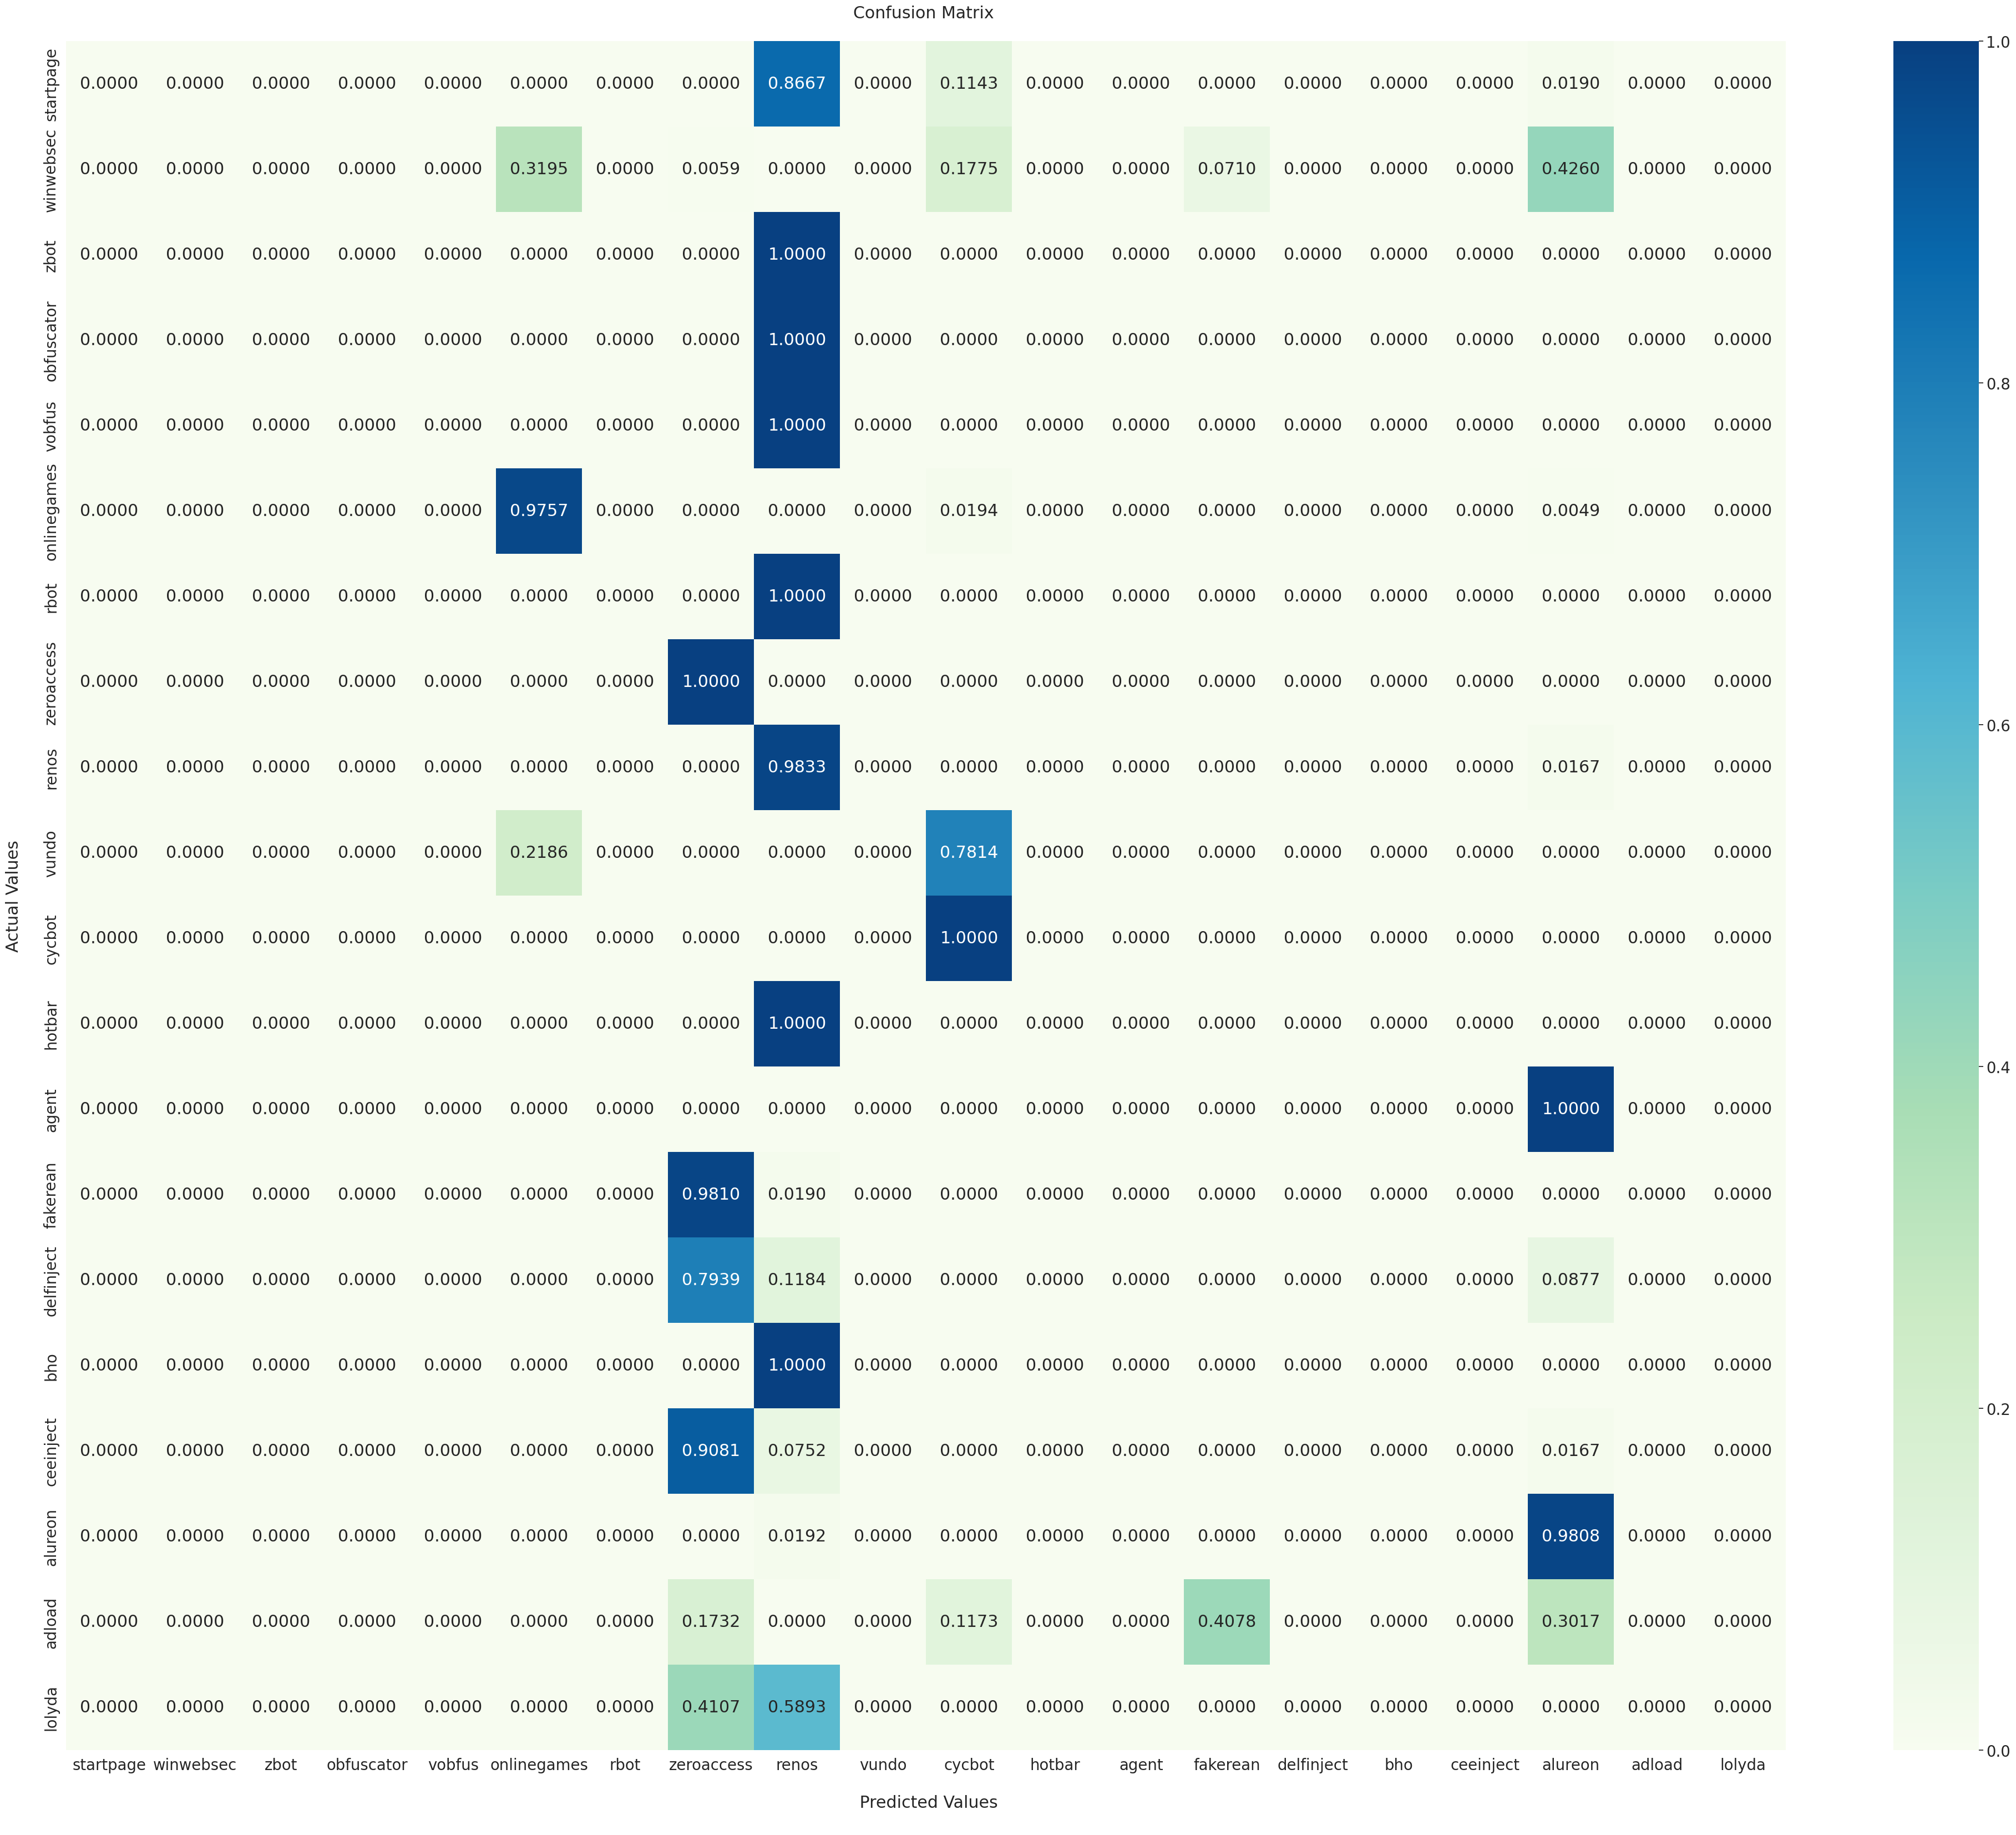

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
cm = confusion_matrix(test_labels, prediction_NN ,normalize='true')

plt.figure(figsize=(50,40))
sns.set(font_scale=1.8)
fx=sns.heatmap(cm, annot=True,fmt='.4f',cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(folders)
fx.yaxis.set_ticklabels(folders)
plt.show()

# **S&P**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/s&p_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

startpage
winwebsec
zbot
obfuscator
vobfus
onlinegames
rbot
zeroaccess
renos
vundo
cycbot
hotbar
agent
fakerean
delfinject
bho
ceeinject
alureon
adload
lolyda


In [ ]:
print(len(test_images))
print(len(test_labels))

2408
2408


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = load_model('/content/drive/MyDrive/Malware/Merged_model_128x128_Malhub.h5')

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.053156146179401995
Macro-Averaged F1 Score: 0.01414755457308649
Accuracy: 0.053156146179401995
Micro-Averaged Precision: 0.053156146179401995
Macro-Averaged Precision: 0.007799171338045333
Micro-Averaged Recall: 0.053156146179401995
Macro-Averaged Recall: 0.07605466428995841


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Speckle**

In [ ]:
# Read input images and assign labels based on folder names

test_path = os.path.join("/content/drive/MyDrive/Malware/noise/speckle_noise/*")

#Capture training data and labels into respective lists
test_images = []
test_labels = []

for directory_path in glob.glob(test_path):
    label = directory_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(label)

#Convert lists to arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
print(len(test_images))
print(len(test_labels))

0
0


In [ ]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
x_test, y_test = test_images, test_labels_encoded

In [ ]:
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test_one_hot = to_categorical(y_test)

In [ ]:
model = load_model('/content/drive/MyDrive/Malware/Merged_model_128x128_Malhub.h5')

In [ ]:
y_pred = model.predict(x_test)


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [ ]:
predicted_classes = np.argmax(y_pred, axis=1)
true_classes = np.argmax(y_test_one_hot, axis=1)

In [ ]:
f1_micro = f1_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged F1 Score:", f1_micro)

f1_macro = f1_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged F1 Score:", f1_macro)

accuracy = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", accuracy)

precision_micro = precision_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Precision:", precision_micro)

precision_macro = precision_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Precision:", precision_macro)

recall_micro = recall_score(true_classes, predicted_classes, average='micro')
print("Micro-Averaged Recall:", recall_micro)

recall_macro = recall_score(true_classes, predicted_classes, average='macro')
print("Macro-Averaged Recall:", recall_macro)

Micro-Averaged F1 Score: 0.053156146179401995
Macro-Averaged F1 Score: 0.01414755457308649
Accuracy: 0.053156146179401995
Micro-Averaged Precision: 0.053156146179401995
Macro-Averaged Precision: 0.007799171338045333
Micro-Averaged Recall: 0.053156146179401995
Macro-Averaged Recall: 0.07605466428995841


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
